In [142]:
import pandas as pd

In [143]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [144]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [145]:
df['Extracurricular Activities'].unique()

array(['Yes', 'No'], dtype=object)

In [146]:
extracurricular_activities_values = {"Yes": 1, "No": 0}
df['Extracurricular Activities'] = df['Extracurricular Activities'].map(extracurricular_activities_values)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [148]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,10000.0,0.4948,0.499998,0.0,0.0,0.0,1.0,1.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [162]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

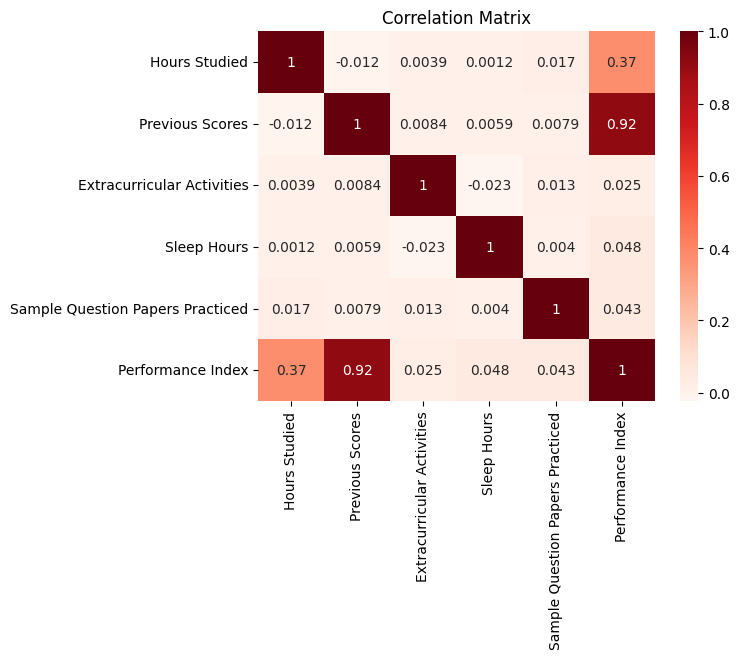

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(), cmap="Reds", annot=True)
plt.title("Correlation Matrix")

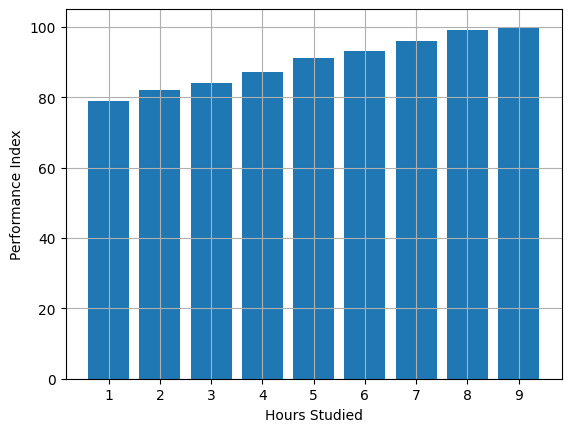

In [151]:
plt.bar(df['Hours Studied'], df['Performance Index'])
plt.xticks(df['Hours Studied'].unique())
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(True)

Text(0, 0.5, 'Performance Index')

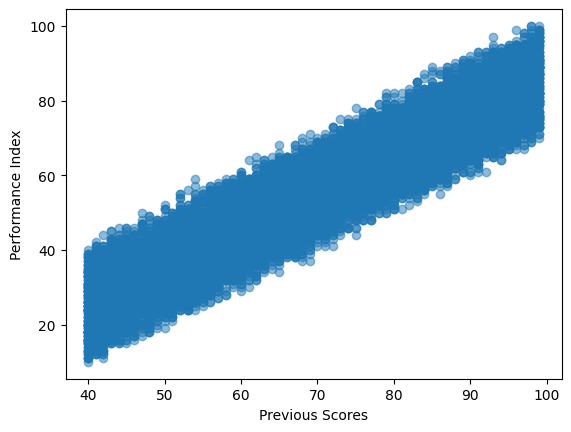

In [152]:
plt.scatter(df['Previous Scores'], df['Performance Index'], alpha=0.5)
plt.xlabel('Previous Scores')
plt.ylabel('Performance Index')

In [153]:
import numpy as np

def rmse(target, predicted):
    return np.sqrt(np.mean(np.square(target - predicted)))

In [154]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
inputs = df.drop(['Performance Index'], axis=1)
target = df['Performance Index']

print(inputs.shape)
print(target.shape)

(10000, 5)
(10000,)


In [155]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 0.2, random_state = 42)

In [156]:
model.fit(X_train, y_train)

LinearRegression()

In [157]:
predictions = model.predict(X_test)
predictions

array([54.71185392, 22.61551294, 47.90314471, ..., 16.79341955,
       63.34327368, 45.94262301])

2.0205515085050063


Text(0, 0.5, 'predictions')

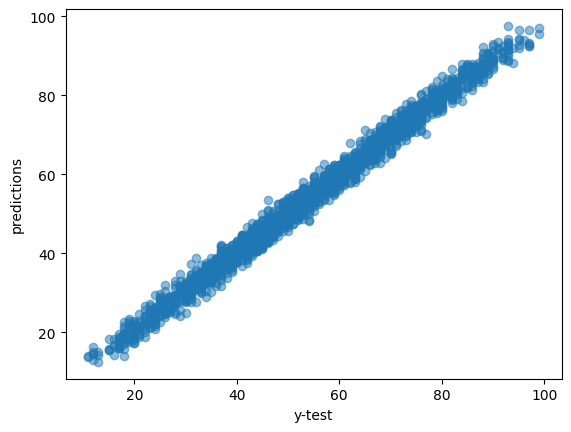

In [158]:
print(rmse(target=y_test, predicted=predictions))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("y-test")
plt.ylabel("predictions")

In [159]:
w = model.coef_
c = model.intercept_

print(w)
print(c)

[2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
-33.921946215554804


In [160]:
hours_studied = 9
previous_scores = 70
extracurricular_activities = 1
sleep_hours = 9
sample_question_paper_practiced = 9

student = [[hours_studied, previous_scores, extracurricular_activities, sleep_hours, sample_question_paper_practiced]]
performance_index =  model.predict(student)
performance_index

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.56715609])